# Excercise 6 - Numerical elements, moving to more than one dimension

**This exercise should be handed in as a PDF**

**Names of collaborators:**
- Matrim Cirullo-Nesbitt
- Abhishek Vilekar
- Andrew Gabaldon

This week we will:
1. Practice using Python syntax and variable manipulation.
2. Utilize analytical solutions to create more refined functions
3. Work in two, three or even higher dimensions

Below, we import the libraries we need.

In [8]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d
%matplotlib inline
# Remember to run all cells before exporting to pdf

## Modeling the motion of a soccer ball in 3D

We work with a three-dimensional variant of the previous numerical exercise from last week.

Assume we have a soccer ball moving in three dimensions with the following trajectory:

1. $x(t) = 10t\cos(\frac{\pi}{2})$
2. $y(t) = 10t\sin(\frac{\pi}{2})$
3. $z(t) = 10t - \frac{9.81}{2}t^2$

Create a three-dimensional plot using these equations.

- 6a - With a flight time of 2.04s and a time step of 0.1s, create a time array t using numpy functions. Then create an array r that holds the locations of the ball x, y, and z as its columns. At each point in the time array, the array r should have the location of the ball according to the analytical functions above.



In [9]:
t=np.arange(0.0,2.04,0.1)
r=[]
for i in range(len(t)):
    x_pos=0                                 #cos(pi/2)=0 so x(t) is 0 for all t
    y_pos=10*t[i]*np.sin(np.pi/2)
    z_pos=10*t[i]-(9.81/2)*t[i]**2
    r.append([x_pos,y_pos,z_pos])
r=np.array(r)
print(r)

[[ 0.       0.       0.     ]
 [ 0.       1.       0.95095]
 [ 0.       2.       1.8038 ]
 [ 0.       3.       2.55855]
 [ 0.       4.       3.2152 ]
 [ 0.       5.       3.77375]
 [ 0.       6.       4.2342 ]
 [ 0.       7.       4.59655]
 [ 0.       8.       4.8608 ]
 [ 0.       9.       5.02695]
 [ 0.      10.       5.095  ]
 [ 0.      11.       5.06495]
 [ 0.      12.       4.9368 ]
 [ 0.      13.       4.71055]
 [ 0.      14.       4.3862 ]
 [ 0.      15.       3.96375]
 [ 0.      16.       3.4432 ]
 [ 0.      17.       2.82455]
 [ 0.      18.       2.1078 ]
 [ 0.      19.       1.29295]
 [ 0.      20.       0.38   ]]


- 6b - Plot the array in 3D using matplotlib to illustrate the trajectory of the ball.

<Figure size 640x480 with 0 Axes>

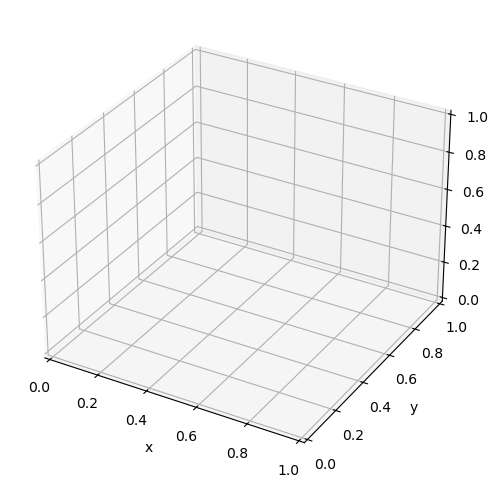

<Figure size 640x480 with 0 Axes>

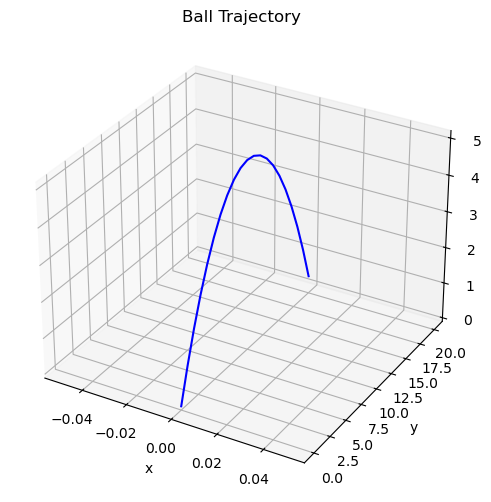

In [10]:
fig=plt.figure()
plt.figure(figsize=(10,6))
ax=plt.axes(projection='3d')
xline=r[:,0]
yline=r[:,1]
zline=r[:,2]
ax.plot3D(xline,yline,zline,'blue')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')
ax.set_title('Ball Trajectory')
plt.show()

- 6c - What is the analytical solution for our theoretical golf ball's position $r(t)$ over time from Exercise 4? What is the formula for the time $t_f$ when the golf ball hits the ground? Use this to adapt your program above to a function that computes and plots our analytical solutions *(use different functions for computing and plotting)*. This program should take an initial velocity and the angle $\theta$ that the ball was hit with in degrees. It should also produce a 3D graph of the motion. You need also to find the maximum values for $x,y,$ and $z$.

From Exercise 4, the formula for the golf ball are:

In parametric form w.r.t. $t$,
$$ \vec{q}(t)= \vec{v}_0 t - \frac{1}{2}g t^2 \hat{z};$$
In scalar form w.r.t. $t$ and $\theta$,
$$ \begin{cases}
    x(t) = & |\vec{v}_0|\cos(\theta) t\\
    y(t) = & 0\\
    z(t) = & |\vec{v}_0|\sin(\theta) t - \frac{1}{2}gt^2
\end{cases}$$

In [11]:
def t_flight(initial_velocity,theta_deg):
    t_f=2*initial_velocity*np.sin(np.deg2rad(theta_deg))/9.81
    return t_f

def max_pos(initial_velocity,theta_deg):
    X_max=initial_velocity*np.cos(np.deg2rad(theta_deg))*t_flight(initial_velocity,theta_deg)/2
    Y_max=0
    Z_max=initial_velocity*np.sin(np.deg2rad(theta_deg))*t_flight(initial_velocity,theta_deg)/2 - 1/2*9.81*(t_flight(initial_velocity,theta_deg)/2)**2
    return [X_max, Y_max, Z_max]

def plot_traj(initial_velocity,theta_deg,limit_xyz=None):
    t_array=np.arange(0.0, t_flight(initial_velocity, theta_deg), 0.1)
    R_pos=[]
    for i in range(len(t_array)):
        X_pos=initial_velocity*np.cos(np.deg2rad(theta_deg))*t_array[i]
        Y_pos=0
        Z_pos=initial_velocity*np.sin(np.deg2rad(theta_deg))*t_array[i] - 1/2*9.81*(t_array[i])**2
        R_pos.append([X_pos, Y_pos, Z_pos])

    R_pos=np.array(R_pos)
    fig=plt.figure()
    plt.figure(figsize=(10,6))
    ax=plt.axes(projection='3d')
    Xline=R_pos[:,0]
    Yline=R_pos[:,1]
    Zline=R_pos[:,2]
    ax.set_xlabel('x')
    ax.set_ylabel('y')
    ax.set_zlabel('z')
    if limit_xyz != None:
        ax.set_xlim(limit_xyz[0])
        ax.set_ylim(limit_xyz[1])
        ax.set_zlim(limit_xyz[2])
    ax.set_title(10*""+'Ball Trajectory'+""*10)
    return ax.plot3D(Xline,Yline,Zline,'blue')

def Ball_Model(initial_velocity, theta_deg, limit_xyz=None):
    return plot_traj(initial_velocity,theta_deg,limit_xyz), print("The maximum positions are", max_pos(initial_velocity,theta_deg),"for x,y,z respectively")
    
    

- 6d - Given initial values of $v_i = 90\frac{\text{m}}{\text{s}}, \theta = \frac{\pi}{6}$, what would our maximum $x,y,$ and $z$ components be? Call the function from 6c.

In [12]:
Ball_Model(90, np.rad2deg(np.pi/6))

The maximum positions are [357.5334235807315, 0, 103.2110091743119] for x,y,z respectively


([<mpl_toolkits.mplot3d.art3d.Line3D at 0x218475a4d10>], None)

- 6e - Given intitial values $v_i = 45\frac{\text{m}}{\text{s}}, \theta = \frac{\pi}{2}$, what would our maximum $x,y,$ and $z$ components be? Call the function from 6c.

In [13]:
Ball_Model(45, np.rad2deg(np.pi/2),)

The maximum positions are [1.2639703202208921e-14, 0, 103.21100917431193] for x,y,z respectively


([<mpl_toolkits.mplot3d.art3d.Line3D at 0x218476161b0>], None)